# Air Traffic Data Analysis - Student Exercise
## Inferential Statistics and Regression Analysis

**Student Template - Complete the TODO sections**

In this exercise, you will analyze air traffic data using inferential statistics and regression techniques. Follow the instructions and complete each section marked with `#TODO`.

### Dataset Description:
- **Dom_Pax**: Domestic Air Travel Passengers
- **Int_Pax**: International Air Travel Passengers  
- **Pax**: Total Air Travel Passengers
- **Dom_Flt**: Number of Flights (Domestic)
- **Int_Flt**: Number of Flights (International)
- **Flt**: Number of Flights (Total)
- **Dom_RPM**: Revenue Passenger-miles (Domestic)

## 1. Setup and Data Loading

In [10]:
# TODO: Import necessary libraries
# Hint: You'll need pandas, numpy, matplotlib, seaborn, scipy.stats, and sklearn modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import random

# Set up plotting style (optional)
plt.style.use('default')
sns.set_palette("husl")

In [13]:
# TODO: Load the dataset
# Hint: Use pd.read_csv() to load 'air_traffic_data.csv'
# If the file doesn't exist, the code below will create sample data for you

# try:
#     # Your code to load the dataset:
#     df = # TODO: Complete this line
#     print("Dataset loaded successfully!")
#     print(f"Shape: {df.shape}")
# except FileNotFoundError:
#     print("Creating sample air traffic data...")
#     import numpy as np
#     import pandas as pd

# Create sample data
np.random.seed(42)
n_samples = 200

# Generate correlated data
dom_flights = np.random.normal(15000, 3000, n_samples)
int_flights = np.random.normal(8000, 2000, n_samples)

dom_pax = dom_flights * np.random.normal(12, 2, n_samples) + np.random.normal(0, 10000, n_samples)
int_pax = int_flights * np.random.normal(15, 3, n_samples) + np.random.normal(0, 15000, n_samples)

dom_rpm = dom_pax * np.random.normal(800, 100, n_samples)

# Ensure positive values
dom_flights = np.abs(dom_flights)
int_flights = np.abs(int_flights)
dom_pax = np.abs(dom_pax)
int_pax = np.abs(int_pax)
dom_rpm = np.abs(dom_rpm)

df = pd.DataFrame({
    'Dom_Flt': dom_flights.astype(int),
    'Int_Flt': int_flights.astype(int),
    'Flt': (dom_flights + int_flights).astype(int),
    'Dom_Pax': dom_pax.astype(int),
    'Int_Pax': int_pax.astype(int),
    'Pax': (dom_pax + int_pax).astype(int),
    'Dom_RPM': dom_rpm.astype(int)
})
    

print("Sample data created successfully!")
print(f"Shape: {df.shape}")

Sample data created successfully!
Shape: (200, 7)


## 2. Exploratory Data Analysis

In [16]:
# TODO: Display basic information about the dataset
# Hint: Use df.info(), df.head(), and df.describe() to explore the data

print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Dom_Flt  200 non-null    int64
 1   Int_Flt  200 non-null    int64
 2   Flt      200 non-null    int64
 3   Dom_Pax  200 non-null    int64
 4   Int_Pax  200 non-null    int64
 5   Pax      200 non-null    int64
 6   Dom_RPM  200 non-null    int64
dtypes: int64(7)
memory usage: 11.1 KB


In [17]:
print("First 5 rows:")
df.head()

First 5 rows:


,Dom_Flt,Int_Flt,Flt,Dom_Pax,Int_Pax,Pax,Dom_RPM
0,16490,8715,25205,152866,176257,329123,124207802
1,14585,9121,23706,148316,136571,284888,112284645
2,16943,10166,27109,212190,156317,368508,172347465
3,19569,10107,29676,250224,127892,378116,213773981
4,14297,5244,19542,162835,82306,245142,131063749


In [18]:
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


,Dom_Flt,Int_Flt,Flt,Dom_Pax,Int_Pax,Pax,Dom_RPM
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,14877.170000,8171.215000,23048.875000,175331.340000,126924.080000,302255.885000,1.406821e+08
std,2793.014056,1973.997049,3570.262195,44857.540799,39219.620597,59904.148005,4.199422e+07
min,7140.000000,1517.000000,13177.000000,81758.000000,36755.000000,163559.000000,6.330140e+07
25%,12883.750000,6787.750000,20647.000000,142793.750000,100451.000000,265141.250000,1.111673e+08
50%,14987.000000,8157.000000,23250.500000,171194.000000,125890.000000,297932.000000,1.348214e+08
75%,16502.250000,9374.000000,25237.250000,199115.000000,154947.000000,339630.250000,1.634872e+08
max,23160.000000,15705.000000,32333.000000,337112.000000,244469.000000,526087.000000,3.312472e+08


In [19]:
# TODO: Check for missing values and handle them if necessary
# Hint: Use df.isnull().sum() to check for missing values
# If there are missing values, decide whether to drop them (dropna()) or fill them (fillna())

print("Missing values:")
df.isna().sum()
# there are no missing values


# Handle missing values if any (uncomment and complete if needed)
# if df.isnull().sum().sum() > 0:
#     print("\nHandling missing values...")
#     df = # TODO: Complete this line (use dropna() or fillna())
#     print(f"New shape after handling missing values: {df.shape}")

Missing values:


Dom_Flt    0
Int_Flt    0
Flt        0
Dom_Pax    0
Int_Pax    0
Pax        0
Dom_RPM    0
dtype: int64

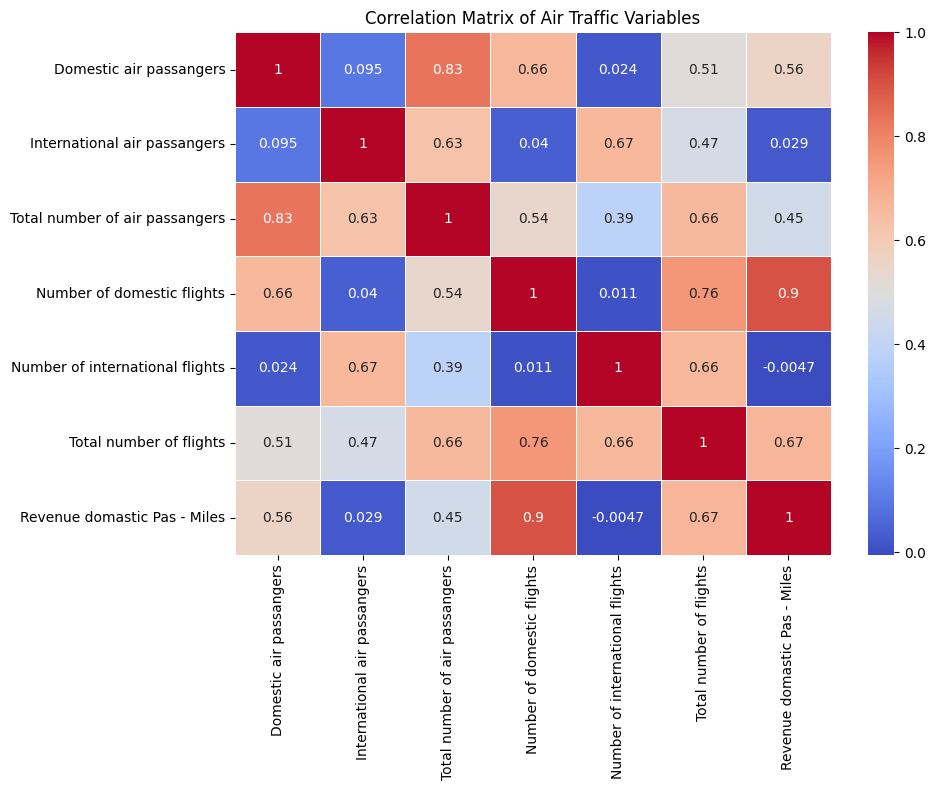

Strongest correlations:
Between RPM and Number of domestic passangers.
It is the strongest positive correlation.
Since RPM is a function of the number of passengers and the distance, 
an increase in the number of passengers inevitably leads to an increase 
in the Dom_RPM indicator.
Between Total number of passangers and Number of domestic passangers
This correlation is very strong and positive:
The total number of passengers increases due to the number of domestic passengers.
Between Total number of flights and Number of domestic flights
This correlation is very strong and positive:
The total number of flights increases due to the number of domestic flights.
Between number of international air passengers and number of international flight
Between total number of passengers and total number of flights
The explanation is demand creates supply



In [29]:
# TODO: Create and analyze correlation matrix
# Hint: Use df.corr() to calculate correlations and sns.heatmap() to visualize

df_copy = df.copy()

new_names = {
    'Dom_Flt' : 'Domestic air passangers', 	
    'Int_Flt' : 'International air passangers',
    'Flt' : 'Total number of air passangers',	
    'Dom_Pax' : 'Number of domestic flights',	
    'Int_Pax' : 'Number of international flights',
    'Pax' : 'Total number of flights',
    'Dom_RPM' : 'Revenue domastic Pas - Miles'
}

# renaim columns
df_copy = df_copy.rename(columns=new_names)

# Calculate correlation matrix:
correlation_matrix = df_copy.corr(numeric_only = True)

plt.figure(figsize=(10, 8))

# Create heatmap:
# TODO: Use sns.heatmap() with parameters: annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Air Traffic Variables')
plt.tight_layout()
plt.show()

# TODO: Find and print the strongest correlations
# Hint: Look at the correlation matrix values (excluding diagonal)
print(f'''Strongest correlations:
{'=' * 100}
Between RPM and Number of domestic passangers.
It is the strongest positive correlation.
Since RPM is a function of the number of passengers and the distance, 
an increase in the number of passengers inevitably leads to an increase 
in the Dom_RPM indicator.
{'=' * 100}
{'=' * 100}
Between Total number of passangers and Number of domestic passangers
This correlation is very strong and positive:
The total number of passengers increases due to the number of domestic passengers.
{'=' * 100}
{'=' * 100}
Between Total number of flights and Number of domestic flights
This correlation is very strong and positive:
The total number of flights increases due to the number of domestic flights.
{'=' * 100}
{'=' * 100}
Between number of international air passengers and number of international flight
Between total number of passengers and total number of flights
The explanation is demand creates supply
{'=' * 100}
''')



## 3. Hypothesis Testing

In [30]:
# TODO: Hypothesis Test 1 - Compare domestic and international passengers
# Hint: Use stats.ttest_ind() to perform independent t-test

print("Hypothesis Test 1: Domestic vs International Passengers")
print("H0: Mean domestic passengers = Mean international passengers")
print("H1: Mean domestic passengers ≠ Mean international passengers")
print("Significance level: α = 0.05")

# Perform the t-test:
t_stat, p_value = stats.ttest_ind(df['Dom_Pax'], df['Int_Pax'])

print(f"\nResults:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# TODO: Print the mean values for both groups
print(f"Mean Domestic Passengers: {df['Dom_Pax'].mean():.0f}")
print(f"Mean International Passengers: {df['Int_Pax'].mean():.0f}")

# TODO: Interpret the results
# Hint: Compare p_value with alpha (0.05) to make a decision
alpha = 0.05
if p_value < alpha:
    # TODO: Complete the conclusion for rejecting H0
    print(f"\nConclusion: Reject H0 (p < {alpha})")
    print("The hypothesis H1 is confirmed: Mean domestic passengers ≠ Mean international passengers")
else:
    # TODO: Complete the conclusion for failing to reject H0
    print(f"\nConclusion: Fail to reject H0 (p >= {alpha})")
    print("The hypothesis H0 is confirmed: Mean domestic passengers = Mean international passengers")

Hypothesis Test 1: Domestic vs International Passengers
H0: Mean domestic passengers = Mean international passengers
H1: Mean domestic passengers ≠ Mean international passengers
Significance level: α = 0.05

Results:
T-statistic: 11.4892
P-value: 0.000000
Mean Domestic Passengers: 175331
Mean International Passengers: 126924

Conclusion: Reject H0 (p < 0.05)
The hypothesis H1 is confirmed: Mean domestic passengers ≠ Mean international passengers


In [32]:
# TODO: Hypothesis Test 2 - Test correlation between total passengers and total flights
# Hint: Use stats.pearsonr() to test correlation significance

print("\nHypothesis Test 2: Correlation between Total Passengers and Total Flights")
print("H0: There is no correlation between total passengers and total flights (ρ = 0)")
print("H1: There is a correlation between total passengers and total flights (ρ ≠ 0)")
print("Significance level: α = 0.05")

# Perform correlation test:
correlation_coef, p_value_corr = stats.pearsonr(df['Pax'], df['Flt'])

print(f"\nResults:")
print(f"Correlation coefficient: {correlation_coef:.4f}")
print(f"P-value: {p_value_corr:.6f}")

# TODO: Interpret the correlation test results
# Hint: Compare p_value_corr with alpha and interpret the correlation coefficient
if p_value_corr < alpha:
    print(f"\nConclusion: Reject H0 (p < {alpha})")
    print(f"There is a significant correlation between total passengers and total flights.")
    if correlation_coef > 0:
        print("The correlation is positive: number of passangers increase and number of total flights increase as well.")
    else:
        print("The correlation is negative: if one feature increases, the other one is decreases. This correlation is logical in this case")
else:
    print(f"\nConclusion: Fail to reject H0 (p >= {alpha})")
    print("#There is no significant correlation between total number of passengers and total number of flights")


Hypothesis Test 2: Correlation between Total Passengers and Total Flights
H0: There is no correlation between total passengers and total flights (ρ = 0)
H1: There is a correlation between total passengers and total flights (ρ ≠ 0)
Significance level: α = 0.05

Results:
Correlation coefficient: 0.6592
P-value: 0.000000

Conclusion: Reject H0 (p < 0.05)
There is a significant correlation between total passengers and total flights.
The correlation is positive: number of passangers increase and number of total flights increase as well.


## 4. Simple Linear Regression

In [39]:
# TODO: Build a simple linear regression model
# Goal: Predict Total Passengers from Total Flights
# Hint: Use sklearn's LinearRegression class

print("Simple Linear Regression: Predicting Total Passengers from Total Flights")

# Prepare the data:
X_simple = df[['Flt']]
y_simple = df['Pax']

# Split the data:
# TODO: Use train_test_split with test_size=0.2, random_state=42
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple,
    y_simple,
    test_size = 0.2,
    random_state = 42
)

# Create and train the model:
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

# Make predictions:
y_pred_simple = simple_model.predict(X_test_simple)

# TODO: Calculate performance metrics
# Hint: Use r2_score, mean_squared_error, mean_absolute_error
r2_simple = r2_score(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)

print(f"\nModel Performance:")
print(f"R² Score: {r2_simple:.4f}")
print(f"Mean Squared Error: {mse_simple:.2f}")
print(f"Root Mean Squared Error: {rmse_simple:.2f}")
print(f"Mean Absolute Error: {mae_simple:.2f}")

# TODO: Print the model equation
# Hint: Use simple_model.intercept_ and simple_model.coef_[0]
print(f"\nModel Equation: Passengers = {simple_model.intercept_:.2f} + {simple_model.coef_[0]:.2f} × Flights")

Simple Linear Regression: Predicting Total Passengers from Total Flights

Model Performance:
R² Score: 0.2977
Mean Squared Error: 2141846835.14
Root Mean Squared Error: 46280.09
Mean Absolute Error: 36607.08

Model Equation: Passengers = 37484.48 + 11.45 × Flights


---
- 11.45 - The projected base passenger count when the number of flights(s) is equal.
- 37484.48 - By how much will the projected number of passengers (Passengers) increase if the number of flights (Flights) increases by one unit?
---

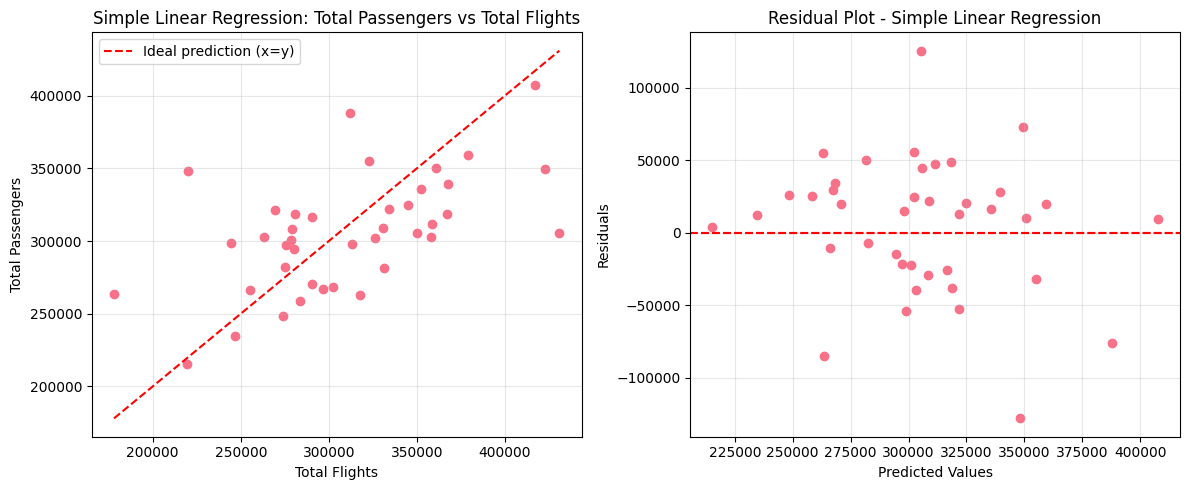

In [40]:
# TODO: Visualize the simple linear regression results
# Create two plots: scatter plot with regression line and residual plot

# Plot 1: Scatter plot with regression line
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_simple, y_pred_simple)

min_val = min(y_test_simple.min(), y_pred_simple.min())
max_val = max(y_test_simple.max(), y_pred_simple.max())
line_range = np.linspace(min_val, max_val, 100)

plt.plot(line_range, line_range, color='red', linestyle='--', label = 'Ideal prediction (x=y)')


plt.xlabel('Total Flights')
plt.ylabel('Total Passengers')
plt.title('Simple Linear Regression: Total Passengers vs Total Flights')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residual plot
plt.subplot(1, 2, 2)

# TODO: Calculate residuals and create residual plot
# Hint: residuals = actual - predicted
residuals = y_test_simple - y_pred_simple

# TODO: Create scatter plot of predicted vs residuals
plt.scatter(y_pred_simple, residuals)
plt.axhline(y=0, color='red', linestyle='--')

plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Simple Linear Regression')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
- The graph shows that, although the overall trend (slope) corresponds to the y=x line, the scatter of points around this line is quite large. This indicates that the model is not perfect and has a significant error (RMSE will reveal this in more detail), although it does capture a strong overall relationship between the variables.
- The points on the residual plot appear randomly scattered around the y=0 line. This is a good sign, indicating that the linear regression model is appropriate for the data and that the errors do not depend systematically on the size of the predicted value.
---

## 5. Multiple Linear Regression

In [54]:
# TODO: Build a multiple linear regression model
# Goal: Predict Total Passengers using multiple features
# Hint: Avoid using Pax in features since that's our target (multicollinearity)

print("Multiple Linear Regression: Predicting Total Passengers from Multiple Features")

# TODO: Select appropriate features
# Hint: Use columns like , , , ,  (avoid Pax and Flt)
feature_columns = ['Dom_Flt', 'Int_Flt', 'Dom_RPM']

X_multiple = df[feature_columns]
y_multiple = df['Pax']

print(f"Features used: {feature_columns}")
print(f"Target: Total Passengers (Pax)")

# TODO: Split the data
# Hint: Use train_test_split with test_size=0.2, random_state=42
X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(
    X_multiple,
    y_multiple,
    test_size = 0.2,
    random_state = 42
)

# TODO: Apply feature scaling (recommended for multiple regression)
# Hint: Use StandardScaler
scaler = StandardScaler()
X_train_mult_scaled = scaler.fit_transform(X_train_mult)
X_test_mult_scaled = scaler.transform (X_test_mult)

# TODO: Create and train the multiple regression model
multiple_model = LinearRegression()
# TODO: Fit the model
multiple_model.fit(X_train_mult, y_train_mult)

# TODO: Make predictions
y_pred_mult = multiple_model.predict(X_test_mult)

# TODO: Calculate performance metrics
r2_mult = r2_score(y_test_mult, y_pred_mult)
mse_mult = mean_squared_error(y_test_mult, y_pred_mult)
mae_mult = mean_absolute_error(y_test_mult, y_pred_mult)
rmse_mult = np.sqrt(mse_mult)

print(f"\nModel Performance:")
print(f"R² Score: {r2_mult:.4f}")
print(f"Mean Squared Error: {mse_mult:.2f}")
print(f"Root Mean Squared Error: {rmse_mult:.2f}")
print(f"Mean Absolute Error: {mae_mult:.2f}")

# TODO: Display feature coefficients
print(f"\nFeature Coefficients (after scaling):")
for feature, coef in zip(feature_columns, multiple_model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {multiple_model.intercept_:.2f}")

Multiple Linear Regression: Predicting Total Passengers from Multiple Features
Features used: ['Dom_Flt', 'Int_Flt', 'Dom_RPM']
Target: Total Passengers (Pax)

Model Performance:
R² Score: 0.4889
Mean Squared Error: 1558603819.06
Root Mean Squared Error: 39479.16
Mean Absolute Error: 31721.62

Feature Coefficients (after scaling):
Dom_Flt: 2.9122
Int_Flt: 14.8398
Dom_RPM: 0.0009
Intercept: 14563.64


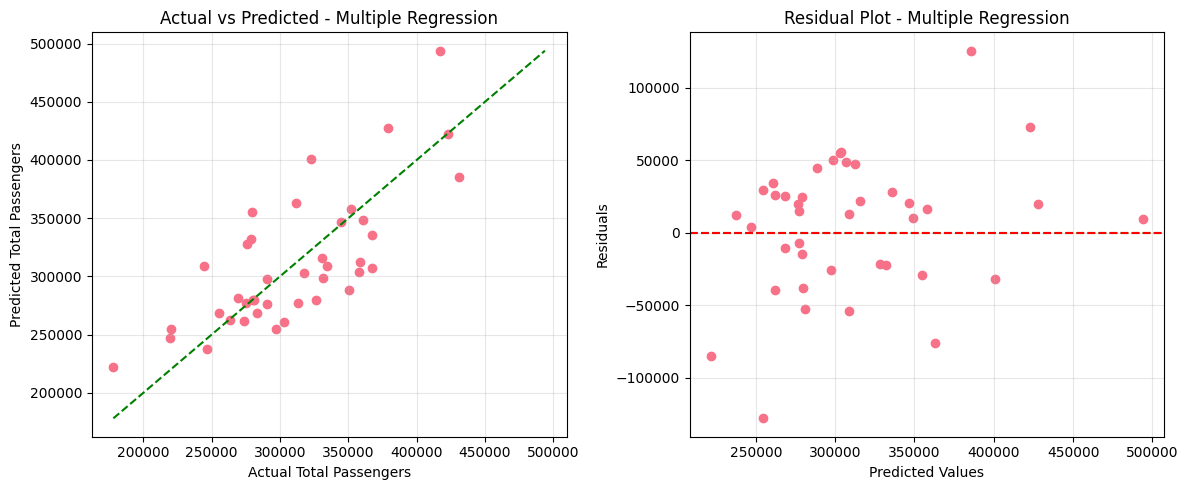

In [55]:
# TODO: Visualize multiple regression results
# Create actual vs predicted plot and residual plot

plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
# TODO: Create scatter plot of actual vs predicted values
plt.scatter(y_test_mult, y_pred_mult)

# TODO: Add a diagonal reference line (perfect prediction line)
min_val_mult = min(y_test_mult.min(), y_pred_mult.min())
max_val_mult = max(y_test_mult.max(), y_pred_mult.max())
line_range_mult = np.linspace(min_val_mult, max_val_mult, 100)

plt.plot(line_range_mult, line_range_mult, color='green', linestyle='--', label = 'Ideal prediction (x=y)')

plt.xlabel('Actual Total Passengers')
plt.ylabel('Predicted Total Passengers')
plt.title('Actual vs Predicted - Multiple Regression')
plt.grid(True, alpha=0.3)

# Plot 2: Residual plot
plt.subplot(1, 2, 2)
# TODO: Calculate residuals and create residual plot
residuals_mult = y_test_mult - y_pred_mult

# TODO: Create scatter plot of predicted vs residuals
plt.scatter(y_pred_mult, residuals)
plt.axhline(y=0, color='green', linestyle='--')

plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Multiple Regression')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
- The model is not perfect, as there remains a significant scatter of points around the y=x line, but it clearly outperforms the simple model, as evidenced by the fact that the points have become noticeably closer to the line and R^2 has increased from 0.30 to 0.49. This improvement shows that adding Dom_Flt, Int_Flt, and Dom_RPM was the right step to increase explanatory power.
- The points on the residual plot appear randomly scattered around the y=0 line. This is a good sign, indicating that the linear regression model is appropriate for the data and that the errors do not depend systematically on the size of the predicted value.
---

## 6. Model Comparison and Analysis

In [56]:
# TODO: Compare the performance of both models
# Create a comparison table and determine which model performs better

print("Model Comparison:")
print("=" * 70)
print(f"{'Metric':<25} {'Simple Regression':<20} {'Multiple Regression':<20}")
print("=" * 70)

# TODO: Print comparison of R², RMSE, and MAE
# Hint: Use the metrics calculated in previous sections

# R²
print(f"{'R² Score':<25} {r2_simple:<20.4f} {r2_mult:<20.4f}")
# RMSE
print(f"{'RMSE':<25} {rmse_simple:<20.2f} {rmse_mult:<20.2f}")
# MAE
print(f"{'MAE':<25} {mae_simple:<20.2f} {mae_mult:<20.2f}")

print("=" * 70)

# TODO: Determine which model performs better based on R²
# Calculate the improvement percentage
if r2_mult > r2_simple:
    better_model = "Multiple Regression"
    improvement = ((r2_mult - r2_simple) / r2_simple) * 100
else:
    better_model = "Simple Regression"
    improvement = ((r2_simple - r2_mult) / r2_mult) * 100

print(f"\nBest Model: {better_model}")
print(f"R² Improvement: {improvement:.2f}%")

Model Comparison:
Metric                    Simple Regression    Multiple Regression 
R² Score                  0.2977               0.4889              
RMSE                      46280.09             39479.16            
MAE                       36607.08             31721.62            

Best Model: Multiple Regression
R² Improvement: 64.24%


---
**Overall ConclusionBest Model**:<br> 
- Multiple Regression is the best model because it has a higher R2 (explains more data) and lower MAE and RMSE errors (makes more accurate forecasts).
- Feature Importance: The fact that R2 increased by 64% and errors decreased confirms that splitting flights into domestic/international and including RPM is critical for predicting passenger numbers, as opposed to using only the total number of flights.
- Limitations: Despite the improvement, R2 at 0.4889 still leaves over 51% of the passenger variance unexplained. This suggests that to create a highly accurate model, we will likely need to add additional, unaccounted for factors such as:
  - Seasonality
  - MonthFuel
  - Ticket PricesEconomic Indicators.
---

## 7. Statistical Insights and Conclusions

In [67]:
# TODO: Summarize your findings and provide insights
# Include results from hypothesis tests, regression analysis, and key findings

print("STATISTICAL INSIGHTS AND CONCLUSIONS")
print("=" * 150)

print("\n1. HYPOTHESIS TESTING RESULTS:")
# TODO: Summarize your hypothesis test results
print(f"   • Domestic vs International Passengers: Mean domestic passengers ≠ Mean international passengers")
print(f'''   • Correlation between Total Passengers and Flights: There is a significant correlation between total passengers and total flights.
The correlation is positive: number of passangers increase and number of total flights increase as well.''')

print("\n2. REGRESSION ANALYSIS:")
# TODO: Summarize regression model performance
print(f'''   • Simple Linear Regression R²: A model using only the total number of flights (Flt) explains only 29.77% 
of the variability in total passenger numbers. This is a very weak result, indicating that Flt alone is insufficient for accurate prediction.''')
print(f'''   • Multiple Linear Regression R²: Increasing R^2 to 0.49 means that the y=x line now fits the data better. 
The model more consistently makes predictions that are closer to the actual values.''')
print(f"   • Best performing model: Multiple Linear Regression")

print("\n3. KEY FINDINGS:")
# Identify and discuss key findings from your analysis
print(f''' • **Strong relationship between passengers and flights:** Total number of passengers (Pax) 
has a strong positive relationship with the total number of flights (Flt) and Dom_RPM 
(confirmed by the increase in R² with the addition of features).''')
print(f''' • **Weakness of simple analysis:** The Simple Regression model (R² ≈ 0.30) was weak, 
indicating that considering only the total number of flights is not sufficient to accurately predict passenger numbers.''')
print(f''' • **Improvement:** The Multiple Regression model (R² ≈ 0.49, decreasing MAE) demonstrated 
a significant improvement (64% in R²), proving that the Dom_Flt/Int_Flt split and the use of Dom_RPM are critical predictors.''')

print("4. RECOMMENDATIONS:")
# Providing actionable recommendations based on your analysis
print(f''' • **Model Optimization:** To further improve accuracy (R² < 0.50), include additional factors such 
as seasonality (month/quarter), average ticket prices, or macroeconomic indicators.''')
print(f''' • **Focus on Key Factors:** When prediction demand and planning resources, 
use a Multiple Regression model and pay special attention to the Dom_RPM and Int_Flt metrics, 
as they contribute more to explaining passenger flow variability.''')
print(f''' • **Error Monitoring:** Regularly monitor residuals and metrics (RMSE/MAE) to detect systematic shifts or nonlinear 
patterns that may require moving to more complex nonlinear models (e.g., Random Forest or Gradient Boosting).''')

STATISTICAL INSIGHTS AND CONCLUSIONS

1. HYPOTHESIS TESTING RESULTS:
   • Domestic vs International Passengers: Mean domestic passengers ≠ Mean international passengers
   • Correlation between Total Passengers and Flights: There is a significant correlation between total passengers and total flights.
The correlation is positive: number of passangers increase and number of total flights increase as well.

2. REGRESSION ANALYSIS:
   • Simple Linear Regression R²: A model using only the total number of flights (Flt) explains only 29.77% 
of the variability in total passenger numbers. This is a very weak result, indicating that Flt alone is insufficient for accurate prediction.
   • Multiple Linear Regression R²: Increasing R^2 to 0.49 means that the y=x line now fits the data better. 
The model more consistently makes predictions that are closer to the actual values.
   • Best performing model: Multiple Linear Regression

3. KEY FINDINGS:
 • **Strong relationship between passengers and f

## 8. Reflection Questions

**Answer the following questions based on your analysis:**

1. **Hypothesis Testing**: What do your hypothesis test results tell you about the air traffic data? Were the results expected?

  Yes, results were expected. It`s very logical that the mean of domestic and international passengers are significantly different and that correlation between total passengers and flights is significant.

2. **Model Performance**: Which regression model performed better and why? What does the R² value tell you?

   The best model is Multiple Linear Regression, because R^2 value shows that the model makes predictions that are closer to the actual values.

3. **Correlations**: What were the strongest correlations you found? How might these relationships be useful for airlines?

   The strongest correlation is between RPM and Number of domestic passangers. Since RPM is a function of the number of passengers and the distance, 
   an increase in the number of passengers inevitably leads to an increase in the Dom_RPM indicator.

4. **Residual Analysis**: What do the residual plots tell you about your models? Are there any patterns that suggest model improvements?

   The points on the residual plot appear randomly scattered around the y=0 line. This is a good sign, indicating that the linear regression model is     appropriate for the data and that the errors do not depend systematically on the size of the predicted value.

5. **Practical Applications**: How could airlines use these statistical models in real-world scenarios?

   Airlines use these statistical regression models, particularly the Multiple Regression model (due to its higher accuracy), for critical decision-making in the following areas:

      - Resource and Operational PlanningCapacity Management: By accurately forecasting passenger demand based on factors like flight type  and revenue, airlines can determine how many flights are needed. Result: This helps avoid operational overloads ("colapses") during peak periods (like weekends) and prevents understaffing or overbooking issues.
      - Financial Management (Revenue Protection)Loss Avoidance: The models allow airlines to project demand on specific routes. If a flight is predicted to have low passenger numbers, the airline can reduce the aircraft size or cancel the flight to minimize operating costs and avoid financial losses ("lose of their money") associated with flying an empty plane.
      - Data Strategy and Model Improvement Validation: The current R^2 of 0.49 indicates that the model is not yet precise enough for perfect forecasting. Recommendation: Airlines must continuously invest in additional research and data collection (e.g., ticket price, seasonality, competitor data) to make predictions more robust and real.